In [2]:
### SIT 378
### Name: Zhiyong Wu
### Student ID: 
### Role:

In [3]:
##### Stage 1: Using Kaggle Data to establish a model

In [4]:
# packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.metrics import explained_variance_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# do not display in scientific notation
np.set_printoptions(suppress=True)

In [5]:
# 1-1 Load the data

# load the whole dataset
kaggle = np.loadtxt('Kaggle_Data.csv',delimiter=',',skiprows=1)

# select power, oxygen, cadence, heart rate
kaggle_selected = kaggle[:,[1,2,3,4]]
kaggle_selected

array([[  0.        , 318.4       ,   0.        ,  75.6       ],
       [  0.        , 356.1666667 ,   0.        ,  75.66666667],
       [  0.        , 403.2857143 ,   0.        ,  75.71428571],
       ...,
       [  0.        , 877.3125    ,  90.        , 123.5625    ],
       [  0.        , 871.14285714,  90.        , 123.5       ],
       [  0.        , 861.5       ,  90.        , 123.41666667]])

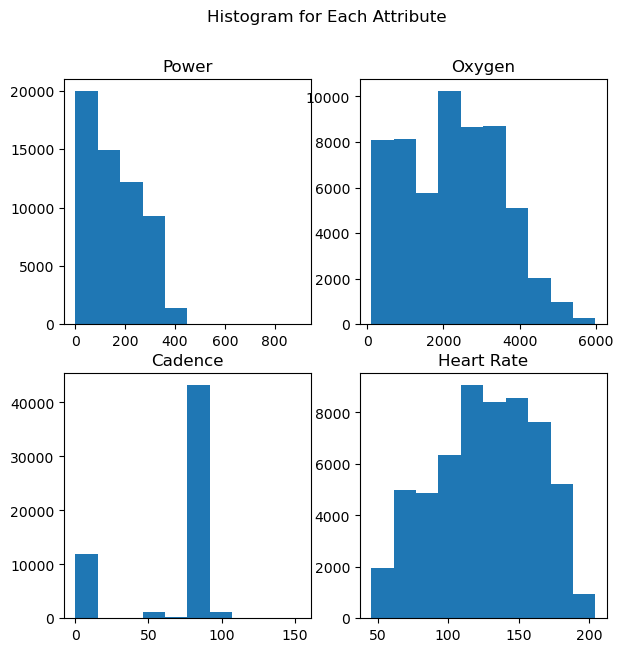

In [6]:
# 1-2 visualize data -- histograms


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7))
fig.suptitle('Histogram for Each Attribute')
 
axes[0][0].hist(kaggle_selected[:,[0]])
axes[0][0].set_title("Power")

axes[0][1].hist(kaggle_selected[:,[1]])
axes[0][1].set_title("Oxygen")
 
axes[1][0].hist(kaggle_selected[:,[2]])
axes[1][0].set_title("Cadence")

axes[1][1].hist(kaggle_selected[:,[3]])
axes[1][1].set_title("Heart Rate")

plt.show()
plt.close()



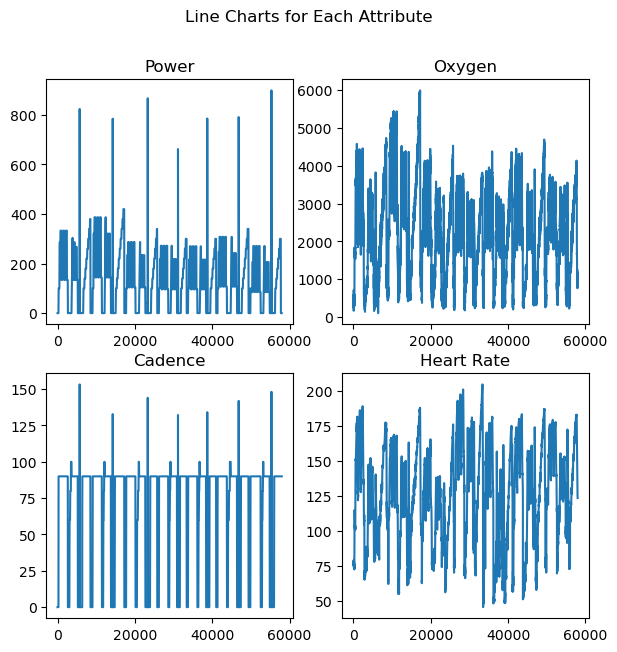

In [7]:
# 1-3 visualize data -- line charts


# define x 
x = np.arange(0,len(kaggle_selected[:,[0]]))


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7))
fig.suptitle('Line Charts for Each Attribute')
 
    
    
    
axes[0][0].plot(x,kaggle_selected[:,[0]])
axes[0][0].set_title("Power")

axes[0][1].plot(x,kaggle_selected[:,[1]])
axes[0][1].set_title("Oxygen")
 
axes[1][0].plot(x,kaggle_selected[:,[2]])
axes[1][0].set_title("Cadence")

axes[1][1].plot(x,kaggle_selected[:,[3]])
axes[1][1].set_title("Heart Rate")

plt.show()
plt.close()


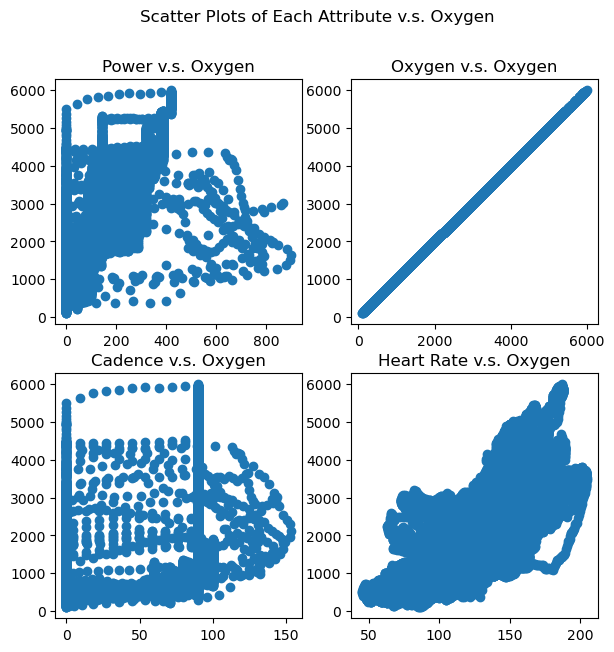

In [8]:
# 1-4 visualize data -- scatter charts - correlations


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7))
fig.suptitle('Scatter Plots of Each Attribute v.s. Oxygen')
    
    
axes[0][0].scatter(kaggle_selected[:,[0]],kaggle_selected[:,[1]])
axes[0][0].set_title("Power v.s. Oxygen")

axes[0][1].scatter(kaggle_selected[:,[1]],kaggle_selected[:,[1]])
axes[0][1].set_title("Oxygen v.s. Oxygen")
 
axes[1][0].scatter(kaggle_selected[:,[2]],kaggle_selected[:,[1]])
axes[1][0].set_title("Cadence v.s. Oxygen")

axes[1][1].scatter(kaggle_selected[:,[3]],kaggle_selected[:,[1]])
axes[1][1].set_title("Heart Rate v.s. Oxygen")

plt.show()
plt.close()


In [9]:
# 1-5 pre-processing data for machine learning

# power, cadence, heart rate as the attributes and oxygen as the target
x = kaggle_selected[:,[0,2,3]]
y = kaggle_selected[:,[1]]

# split the dataset for training and testing (training 70%, testing 20%)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


# print the length of the whole set, training set, and test set
print(len(x),len(y))
print(len(x_train),len(x_test),len(y_train),len(y_test))



57983 57983
40588 17395 40588 17395


In [10]:
# 1-6 initialize an array to store the evaluation matrix

# we evaluate 10 machine learning methods using five matrixes
scores = np.zeros((10,5))



In [11]:
# 1-6 establishing a machine learning model  --- the most basic one --- linear regression

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression as LR

reg = LR().fit(x_train, y_train)
y_predict = reg.predict(x_test)



## Evaluation Matrix:
print("")
print("The evalution of Linear Regression is as follows.")

# Explained variance score (1 for the best)
print("Explained variance score: ",explained_variance_score(y_test, y_predict))  

# R2 score (1 for the best)
print("R2 score: ", r2_score(y_test, y_predict))  

# Mean absolute error
print("Mean absolute error: ",mean_absolute_error(y_test, y_predict))  

# Mean squared error
print("Mean squared error: ",mean_squared_error(y_test, y_predict))  


# Median absolute error (the smaller, the better)
print("Median absolute error: ", median_absolute_error(y_test, y_predict))  


# store the evaluation matrix values


scores[0][0] = explained_variance_score(y_test, y_predict)
scores[0][1] = r2_score(y_test, y_predict)
scores[0][2] = mean_absolute_error(y_test, y_predict)
scores[0][3] = mean_squared_error(y_test, y_predict)
scores[0][4] = median_absolute_error(y_test, y_predict)




The evalution of Linear Regression is as follows.
Explained variance score:  0.8790847891776439
R2 score:  0.879050638108291
Mean absolute error:  298.6938342854376
Mean squared error:  188329.60356875215
Median absolute error:  218.0147861118262


In [57]:
# 1-6 establishing a machine learning model  -- support vector machine

from sklearn.svm import SVR

clf = SVR()
rf = clf.fit (x_train, y_train.ravel())
y_predict = rf.predict(x_test)


## Evaluation Matrix:
print("")
print("The evalution of Support Vector Machine is as follows.")

# Explained variance score (1 for the best)
print("Explained variance score: ",explained_variance_score(y_test, y_predict))  

# R2 score (1 for the best)
print("R2 score: ", r2_score(y_test, y_predict))  

# Mean absolute error
print("Mean absolute error: ",mean_absolute_error(y_test, y_predict))  

# Mean squared error
print("Mean squared error: ",mean_squared_error(y_test, y_predict))  


# Median absolute error (the smaller, the better)
print("Median absolute error: ",median_absolute_error(y_test, y_predict))  


# store the evaluation matrix values

scores[1][0] = explained_variance_score(y_test, y_predict)
scores[1][1] = r2_score(y_test, y_predict)
scores[1][2] = mean_absolute_error(y_test, y_predict)
scores[1][3] = mean_squared_error(y_test, y_predict)
scores[1][4] = median_absolute_error(y_test, y_predict)



The evalution of Support Vector Machine is as follows.
Explained variance score:  0.8889528969200657
R2 score:  0.886518359441424
Mean absolute error:  265.5864900836913
Mean squared error:  175922.56508059194
Median absolute error:  169.63183767642613


In [67]:
# 1-6 establishing a machine learning model  -- Ridge Regression

from sklearn.linear_model import Ridge

clf = Ridge()
rf = clf.fit (x_train, y_train.ravel())
y_predict = rf.predict(x_test)


## Evaluation Matrix:
print("")
print("The evalution of Ridge Regression is as follows.")

# Explained variance score (1 for the best)
print("Explained variance score: ",explained_variance_score(y_test, y_predict))  

# R2 score (1 for the best)
print("R2 score: ", r2_score(y_test, y_predict))  

# Mean absolute error
print("Mean absolute error: ",mean_absolute_error(y_test, y_predict))  

# Mean squared error
print("Mean squared error: ",mean_squared_error(y_test, y_predict))  


# Median absolute error (the smaller, the better)
print("Median absolute error: ",median_absolute_error(y_test, y_predict))  

# store the evaluation matrix values

scores[2][0] = explained_variance_score(y_test, y_predict)
scores[2][1] = r2_score(y_test, y_predict)
scores[2][2] = mean_absolute_error(y_test, y_predict)
scores[2][3] = mean_squared_error(y_test, y_predict)
scores[2][4] = median_absolute_error(y_test, y_predict)


The evalution of Ridge Regression is as follows.
Explained variance score:  0.8817123779829996
R2 score:  0.8817122678639555
Mean absolute error:  295.5152905599042
Mean squared error:  183373.1090995079
Median absolute error:  215.66437379545414


In [58]:
# 1-6 establishing a machine learning model  -- Lasso (Least absolute shrinkage and selection operator)

from sklearn.linear_model import Lasso
clf = Lasso()
rf = clf.fit (x_train, y_train.ravel())
y_predic = rf.predict(x_test)


## Evaluation Matrix:
print("")
print("The evalution of Lasso is as follows.")

# Explained variance score (1 for the best)
print("Explained variance score: ",explained_variance_score(y_test, y_predict))  

# R2 score (1 for the best)
print("R2 score: ", r2_score(y_test, y_predict))  

# Mean absolute error
print("Mean absolute error: ",mean_absolute_error(y_test, y_predict))  

# Mean squared error
print("Mean squared error: ",mean_squared_error(y_test, y_predict))  


# Median absolute error (the smaller, the better)
print("Median absolute error: ",median_absolute_error(y_test, y_predict)) 

# store the evaluation matrix values

scores[3][0] = explained_variance_score(y_test, y_predict)
scores[3][1] = r2_score(y_test, y_predict)
scores[3][2] = mean_absolute_error(y_test, y_predict)
scores[3][3] = mean_squared_error(y_test, y_predict)
scores[3][4] = median_absolute_error(y_test, y_predict)


The evalution of Lasso is as follows.
Explained variance score:  0.8889528969200657
R2 score:  0.886518359441424
Mean absolute error:  265.5864900836913
Mean squared error:  175922.56508059194
Median absolute error:  169.63183767642613


In [59]:
# 1-6 establishing a machine learning model  -- Multi-Layer Perceptron (MLP)

from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(max_iter=1000)
rf = clf.fit (x_train, y_train.ravel())
y_predict = rf.predict(x_test)


## Evaluation Matrix:
print("")
print("The evalution of MLP is as follows.")

# Explained variance score (1 for the best)
print("Explained variance score: ",explained_variance_score(y_test, y_predict))  

# R2 score (1 for the best)
print("R2 score: ", r2_score(y_test, y_predict))  

# Mean absolute error
print("Mean absolute error: ",mean_absolute_error(y_test, y_predict))  

# Mean squared error
print("Mean squared error: ",mean_squared_error(y_test, y_predict))  


# Median absolute error (the smaller, the better)
print("Median absolute error: ",median_absolute_error(y_test, y_predict)) 



# store the evaluation matrix values

scores[4][0] = explained_variance_score(y_test, y_predict)
scores[4][1] = r2_score(y_test, y_predict)
scores[4][2] = mean_absolute_error(y_test, y_predict)
scores[4][3] = mean_squared_error(y_test, y_predict)
scores[4][4] = median_absolute_error(y_test, y_predict)




The evalution of MLP is as follows.
Explained variance score:  0.9209992539453974
R2 score:  0.9209948499023212
Mean absolute error:  251.20386626922385
Mean squared error:  122476.09914122349
Median absolute error:  195.3279246175748


In [61]:
# 1-6 establishing a machine learning model  -- Decision Tree


from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
rf = clf.fit (x_train, y_train.ravel())
y_predict = rf.predict(x_test)


## Evaluation Matrix:
print("")
print("The evalution of Decision Tree is as follows.")

# Explained variance score (1 for the best)
print("Explained variance score: ",explained_variance_score(y_test, y_predict))  

# R2 score (1 for the best)
print("R2 score: ", r2_score(y_test, y_predict))  

# Mean absolute error
print("Mean absolute error: ",mean_absolute_error(y_test, y_predict))  

# Mean squared error
print("Mean squared error: ",mean_squared_error(y_test, y_predict))  


# Median absolute error (the smaller, the better)
print("Median absolute error: ",median_absolute_error(y_test, y_predict)) 



# store the evaluation matrix values

scores[5][0] = explained_variance_score(y_test, y_predict)
scores[5][1] = r2_score(y_test, y_predict)
scores[5][2] = mean_absolute_error(y_test, y_predict)
scores[5][3] = mean_squared_error(y_test, y_predict)
scores[5][4] = median_absolute_error(y_test, y_predict)




The evalution of Decision Tree is as follows.
Explained variance score:  0.9355290132379899
R2 score:  0.9355286624125085
Mean absolute error:  185.77155176418535
Mean squared error:  99945.3570352102
Median absolute error:  103.316666666667


In [62]:
# 1-6 establishing a machine learning model  -- Extra Tree


from sklearn.tree import ExtraTreeRegressor
clf = ExtraTreeRegressor()
rf = clf.fit (x_train, y_train.ravel())
y_predict = rf.predict(x_test)


## Evaluation Matrix:
print("")
print("The evalution of ExtraTreeRegressor is as follows.")

# Explained variance score (1 for the best)
print("Explained variance score: ",explained_variance_score(y_test, y_predict))  

# R2 score (1 for the best)
print("R2 score: ", r2_score(y_test, y_predict))  

# Mean absolute error
print("Mean absolute error: ",mean_absolute_error(y_test, y_predict))  

# Mean squared error
print("Mean squared error: ",mean_squared_error(y_test, y_predict))  


# Median absolute error (the smaller, the better)
print("Median absolute error: ",median_absolute_error(y_test, y_predict)) 



# store the evaluation matrix values

scores[6][0] = explained_variance_score(y_test, y_predict)
scores[6][1] = r2_score(y_test, y_predict)
scores[6][2] = mean_absolute_error(y_test, y_predict)
scores[6][3] = mean_squared_error(y_test, y_predict)
scores[6][4] = median_absolute_error(y_test, y_predict)




The evalution of ExtraTreeRegressor is as follows.
Explained variance score:  0.9361064372270421
R2 score:  0.9361055340412346
Mean absolute error:  186.43046321560124
Mean squared error:  99051.07372957435
Median absolute error:  103.79999999999973


In [100]:
# 1-6 establishing a machine learning model  -- Random Forest


from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
random_forest = clf.fit (x_train, y_train.ravel())
y_predict = random_forest.predict(x_test)

## Evaluation Matrix:
print("")
print("The evalution of RandomForest is as follows.")

# Explained variance score (1 for the best)
print("Explained variance score: ",explained_variance_score(y_test, y_predict))  

# R2 score (1 for the best)
print("R2 score: ", r2_score(y_test, y_predict))  

# Mean absolute error
print("Mean absolute error: ",mean_absolute_error(y_test, y_predict))  

# Mean squared error
print("Mean squared error: ",mean_squared_error(y_test, y_predict))  


# Median absolute error (the smaller, the better)
print("Median absolute error: ",median_absolute_error(y_test, y_predict)) 

# store the evaluation matrix values

scores[7][0] = explained_variance_score(y_test, y_predict)
scores[7][1] = r2_score(y_test, y_predict)
scores[7][2] = mean_absolute_error(y_test, y_predict)
scores[7][3] = mean_squared_error(y_test, y_predict)
scores[7][4] = median_absolute_error(y_test, y_predict)



The evalution of RandomForest is as follows.
Explained variance score:  0.9517013229892095
R2 score:  0.951701258239
Mean absolute error:  168.2790711110451
Mean squared error:  74874.125003281
Median absolute error:  101.05835000000002


In [64]:
# 1-6 establishing a machine learning model  -- Adaboost


from sklearn.ensemble import AdaBoostRegressor
clf = AdaBoostRegressor()
rf = clf.fit (x_train, y_train.ravel())
y_predict = rf.predict(x_test)

## Evaluation Matrix:
print("")
print("The evalution of Adaboost is as follows.")

# Explained variance score (1 for the best)
print("Explained variance score: ",explained_variance_score(y_test, y_predict))  

# R2 score (1 for the best)
print("R2 score: ", r2_score(y_test, y_predict))  

# Mean absolute error
print("Mean absolute error: ",mean_absolute_error(y_test, y_predict))  

# Mean squared error
print("Mean squared error: ",mean_squared_error(y_test, y_predict))  


# Median absolute error (the smaller, the better)
print("Median absolute error: ",median_absolute_error(y_test, y_predict)) 

# store the evaluation matrix values

scores[8][0] = explained_variance_score(y_test, y_predict)
scores[8][1] = r2_score(y_test, y_predict)
scores[8][2] = mean_absolute_error(y_test, y_predict)
scores[8][3] = mean_squared_error(y_test, y_predict)
scores[8][4] = median_absolute_error(y_test, y_predict)



The evalution of Adaboost is as follows.
Explained variance score:  0.8899422377636226
R2 score:  0.8887588228539545
Mean absolute error:  314.9882687069276
Mean squared error:  172449.33303564155
Median absolute error:  250.99863942877278


In [65]:
# 1-6 establishing a machine learning model  -- Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()
rf = clf.fit (x_train, y_train.ravel())
y_predict = rf.predict(x_test)

## Evaluation Matrix:
print("")
print("The evalution of Gradient Boosting is as follows.")

# Explained variance score (1 for the best)
print("Explained variance score: ",explained_variance_score(y_test, y_predict))  

# R2 score (1 for the best)
print("R2 score: ", r2_score(y_test, y_predict))  

# Mean absolute error
print("Mean absolute error: ",mean_absolute_error(y_test, y_predict))  

# Mean squared error
print("Mean squared error: ",mean_squared_error(y_test, y_predict))  


# Median absolute error (the smaller, the better)
print("Median absolute error: ",median_absolute_error(y_test, y_predict)) 

# store the evaluation matrix values

scores[9][0] = explained_variance_score(y_test, y_predict)
scores[9][1] = r2_score(y_test, y_predict)
scores[9][2] = mean_absolute_error(y_test, y_predict)
scores[9][3] = mean_squared_error(y_test, y_predict)
scores[9][4] = median_absolute_error(y_test, y_predict)


The evalution of Gradient Boosting is as follows.
Explained variance score:  0.9460882993293025
R2 score:  0.946088085775963
Mean absolute error:  199.16373319950796
Mean squared error:  83575.82946469558
Median absolute error:  143.12377630169794


Text(0.5, 1.0, 'Explained Variance Score')

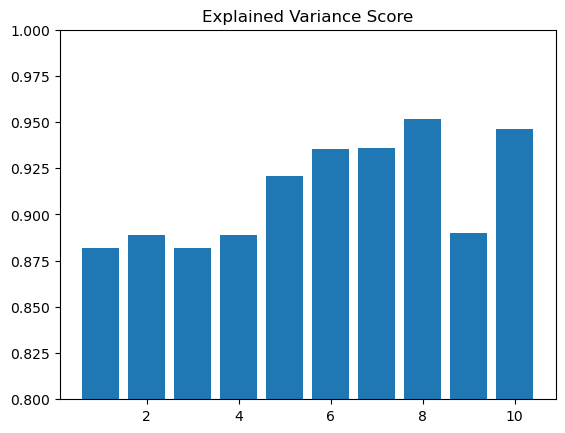

In [70]:
# 1-7 evaluate the perforahnces of all machine learning models -- explained_variance_score

x = np.arange(1,11,1)

plt.bar(x,scores[:,0])
plt.ylim([0.8,1])
plt.title("Explained Variance Score")

Text(0.5, 1.0, 'R2 Score')

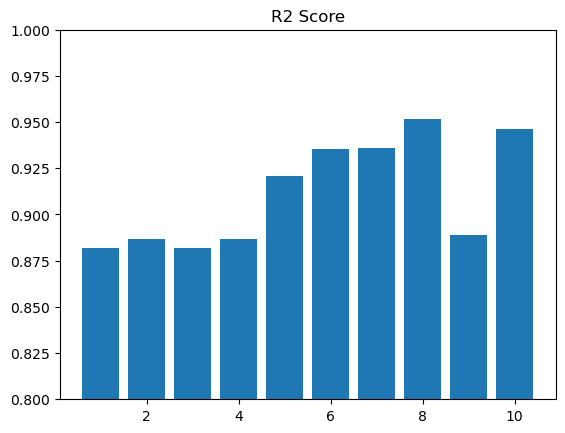

In [72]:
# 1-7 evaluate the perforahnces of all machine learning models -- explained_variance_score

x = np.arange(1,11,1)

plt.bar(x,scores[:,1])
plt.ylim([0.8,1])
plt.title("R2 Score")

Text(0.5, 1.0, 'Mean Abosulte Error')

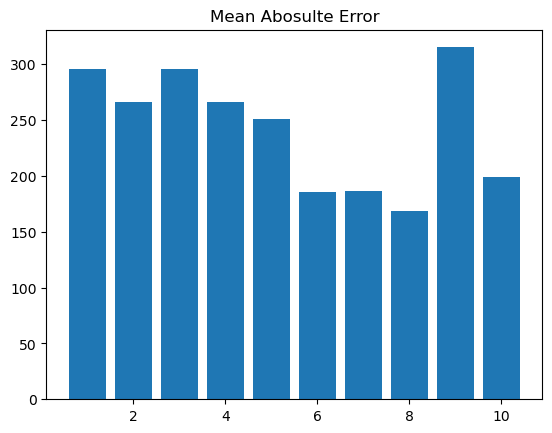

In [73]:
# 1-7 evaluate the perforahnces of all machine learning models -- mean_absolute_error

x = np.arange(1,11,1)

plt.bar(x,scores[:,2])
plt.title("Mean Abosulte Error")

Text(0.5, 1.0, 'Mean Square Error')

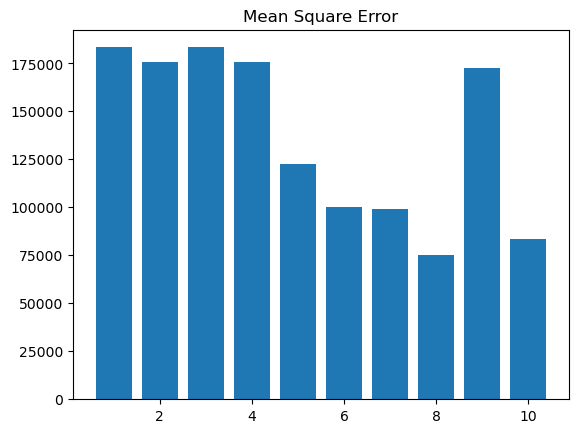

In [75]:
# 1-7 evaluate the perforahnces of all machine learning models -- mean_squared_error

x = np.arange(1,11,1)

plt.bar(x,scores[:,3])
plt.title("Mean Square Error")

Text(0.5, 1.0, 'Median Abosulte Error')

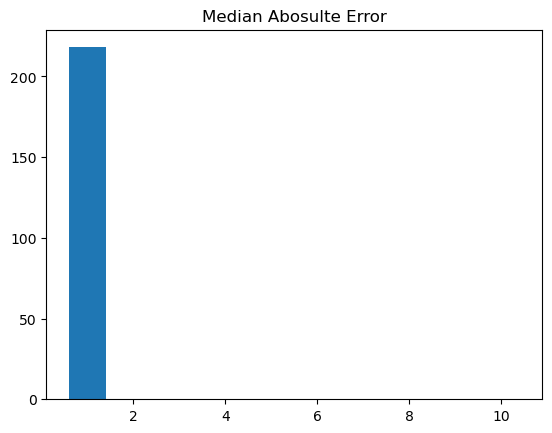

In [12]:
# 1-7 evaluate the perforahnces of all machine learning models -- median_absolute_error

x = np.arange(1,11,1)

plt.bar(x,scores[:,4])
plt.title("Median Abosulte Error")

In [ ]:
# 1-8 brief summary

'''
We test ten regression machine learning models in this series of experiments and using five matrixes to evaluate them.
Ten regression machine learning models include Linear Regression, Support Vector Machine, Ridge Regression, Least 
absolute shrinkage and selection operator (Lasso), Multi-Layer Perceptron (MLP), Decision Tree, Extra Tree, Random 
Forest, AdaBoost, and Gradient Boosting. All the models are trained over 70% and tested over 30% of the whole dataset.
For the first two matrixes, explained variance score and R2 score, the higher the better while the best is 1.
For the last three matrixes, mean absolute error, mean square error, and median absolute error, the lower the
better while 0 is the best. Superisingly, Random Forest has the highers scores and least errors for all five matrixes, 
which means it is the best fit for the dataset. Therefore, we choose it for stage 2 test on the other dataset.
'''

In [14]:
# 2-1 Load the new test data
import xlrd

# load the new dataset in xlsx form

new_data = xlrd.open_workbook('data_3.xls')
table = new_data.sheet_by_name('in')

# extract power values
power = table.col_values(6)
power.pop(0)

# extract cadence values
cadence = table.col_values(2)
cadence.pop(0)

# extract heart rate values
heart_rate = table.col_values(5)
heart_rate.pop(0)

# combine three columns to a new numpy array
new_input_data = np.vstack((np.array(power),np.array(cadence),np.array(heart_rate)))
new_input_data = new_input_data.transpose()

new_input_data

array([[ 2.075 , 66.    ,  0.7162],
       [ 2.0125, 66.    ,  0.7162],
       [ 1.9125, 66.    ,  0.7162],
       ...,
       [ 1.975 , 80.    ,  0.8058],
       [ 1.9875, 80.    ,  0.8058],
       [ 2.1125, 80.    ,  0.8005]])

In [106]:
# 2-2 using the pre-trained random forest model to train the new data
new_predict = random_forest.predict(new_input_data)
new_predict

array([462.09483333, 462.09483333, 462.09483333, ..., 606.64675   ,
       606.64675   , 606.64675   ])

In [108]:
# 2-3 evaluate the model


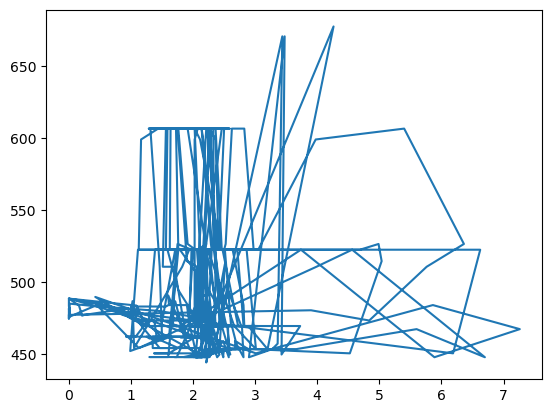

In [110]:
plt.plot(new_input_data[:,0],new_predict)

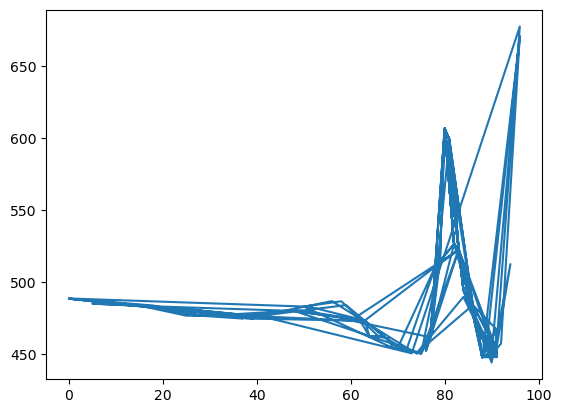

In [111]:
plt.plot(new_input_data[:,1],new_predict)

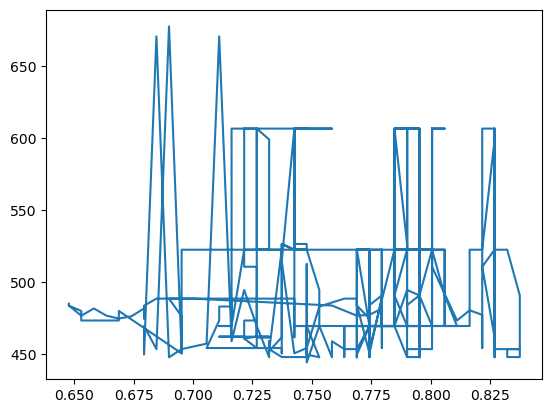

In [112]:
plt.plot(new_input_data[:,2],new_predict)